In [2]:
# Import essential libraries
import pandas as pd                # for data manipulation
import numpy as np                 # for numerical operations
import matplotlib.pyplot as plt    # for data visualization
import seaborn as sns              # for statistical graphics
import datetime as dt              # for date handling
import warnings                    # to suppress warnings
warnings.filterwarnings("ignore")


## Data Loading And Initial Inspection


In [3]:
# Load the dataset
data = pd.read_csv("../Data/bank_data_C.csv")

In [4]:
data.head()


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [6]:
data.describe(include='all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1041614,1041614,1041614,1041614,1041614,1.041614e+06,1041614,1.041614e+06,1.041614e+06
unique,1041614,879358,17233,3,9275,NaN,55,NaN,NaN
top,T1048567,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/16,NaN,NaN
freq,1,6,56292,760978,101997,NaN,27084,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.149986e+05,NaN,1.571221e+05,1.566096e+03
std,NaN,NaN,NaN,NaN,NaN,8.467609e+05,NaN,5.126352e+04,6.561464e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.728140e+03,NaN,1.240410e+05,1.600000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.676852e+04,NaN,1.642470e+05,4.575000e+02
75%,NaN,NaN,NaN,NaN,NaN,5.742885e+04,NaN,2.000220e+05,1.200000e+03


# Data Cleaning

In [7]:
data.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [8]:
# Convert relevant columns to datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   TransactionID            1041614 non-null  object        
 1   CustomerID               1041614 non-null  object        
 2   CustomerDOB              1041614 non-null  datetime64[ns]
 3   CustGender               1041614 non-null  object        
 4   CustLocation             1041614 non-null  object        
 5   CustAccountBalance       1041614 non-null  float64       
 6   TransactionDate          1041614 non-null  datetime64[ns]
 7   TransactionTime          1041614 non-null  int64         
 8   TransactionAmount (INR)  1041614 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 71.5+ MB


In [10]:
# Create 'Age' column from CustomerDOB
today = pd.to_datetime("today")
data['Age'] = (today - data['CustomerDOB']).dt.days // 365


In [11]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,30
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,-32
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,28
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,-49
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,37


In [12]:
# Summary statistics of Age column
data['Age'].describe()


count    1.041614e+06
mean     3.935881e+01
std      5.049108e+01
min     -5.000000e+01
25%      3.200000e+01
50%      3.600000e+01
75%      4.100000e+01
max      2.250000e+02
Name: Age, dtype: float64

In [13]:
# View rows with negative ages
data[data['Age'] < 0]


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
1,T2,C2142763,2057-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.00,-32
3,T4,C5342380,2073-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.00,-49
5,T6,C1536588,2072-08-10,F,ITANAGAR,53609.20,2016-02-08,173940,676.00,-48
15,T16,C8334633,2068-10-07,F,NEW DELHI,1283.12,2016-01-08,125725,250.00,-44
29,T31,C7648712,2067-01-21,F,NEW DELHI,298461.05,2016-03-08,160642,500.00,-42
...,...,...,...,...,...,...,...,...,...,...
1041553,T1048507,C3333984,2070-09-20,M,NAVI MUMBAI,41.82,2016-09-18,182310,878.18,-46
1041557,T1048511,C3429427,2048-07-15,M,HOWRAH,416244.74,2016-09-18,184959,1695.00,-24
1041583,T1048537,C2939947,2033-05-10,M,NEW DELHI,92173.35,2016-09-18,184556,1319.04,-9
1041591,T1048545,C3712582,2071-05-10,M,MUMBAI,25414.52,2016-09-18,182015,400.00,-47


In [14]:
# View rows with very high ages (e.g., over 100)
data[data['Age'] > 100]


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
16,T17,C1376215,1800-01-01,M,MUMBAI,77495.15,2016-01-08,124727,1423.11,225
22,T23,C7018081,1800-01-01,M,WAYS PANCHKUVA AHMEDABAD,143.07,2016-03-08,104718,110.00,225
28,T29,C7935438,1800-01-01,M,MOHALI,969436.12,2016-03-08,183634,36.90,225
34,T36,C1211387,1800-01-01,M,AHMEDABAD,11791.25,2016-03-08,125915,1075.00,225
150,T152,C3334638,1800-01-01,M,PUNE,700.00,2016-09-08,24912,1500.00,225
...,...,...,...,...,...,...,...,...,...,...
1041491,T1048444,C7261226,1800-01-01,M,BHILAI,1393.33,2016-09-18,102427,200.00,225
1041500,T1048453,C3813481,1800-01-01,M,NEW DELHI,984605.24,2016-09-18,84644,219.00,225
1041578,T1048532,C6937679,1800-01-01,M,NEW DELHI,50698.90,2016-09-18,184319,598.86,225
1041580,T1048534,C7431884,1800-01-01,M,MANDIR DHANBAD,53771.64,2016-09-18,184049,520.00,225


In [15]:
# Keep only rows where age is between 1 and 100
data = data[(data['Age'] > 0) & (data['Age'] <= 100)]


In [16]:
# Confirm the cleaned age range
data['Age'].describe()


count    880531.000000
mean         37.075389
std           5.192072
min           1.000000
25%          33.000000
50%          36.000000
75%          41.000000
max          50.000000
Name: Age, dtype: float64

In [17]:
data[data['Age'] < 18]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
387,T391,C4417679,2021-01-19,M,NEW DELHI,1125922.25,2016-10-21,202654,4570.00,4
1324,T1329,C6417656,2021-01-19,M,NEW DELHI,1125922.25,2016-10-21,192755,6300.00,4
1662,T1668,C4217631,2021-01-19,M,NEW DELHI,1125922.25,2016-10-21,195748,2460.00,4
8129,T8174,C1017880,2013-02-20,M,DELHI,20257.22,2016-09-25,191750,359.52,12
12467,T12532,C5333741,2010-10-18,M,FARIDABAD,29225.01,2016-09-27,160248,500.00,14
...,...,...,...,...,...,...,...,...,...,...
1001765,T1008538,C3017630,2021-01-19,M,NEW DELHI,1125922.25,2016-09-13,212632,4285.00,4
1012982,T1019804,C4420589,2014-01-13,M,GHAZIABAD,751220.52,2016-09-13,203924,1849.00,11
1015616,T1022448,C4825367,2008-12-05,F,NEW DELHI,79984.60,2016-09-13,185905,285.00,16
1028779,T1035679,C8528348,2012-07-03,M,NASHIK,26000.92,2016-09-13,102620,570.00,12


In [18]:
# Keep only rows where age is between 18 and 100
data = data[(data['Age'] >= 18) & (data['Age'] <= 100)]

In [19]:
data[data['Age'] < 18]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age


In [20]:
# Confirm the cleaned age range
data['Age'].describe()

count    880342.000000
mean         37.081082
std           5.177652
min          18.000000
25%          33.000000
50%          36.000000
75%          41.000000
max          50.000000
Name: Age, dtype: float64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 880342 entries, 0 to 1041613
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   TransactionID            880342 non-null  object        
 1   CustomerID               880342 non-null  object        
 2   CustomerDOB              880342 non-null  datetime64[ns]
 3   CustGender               880342 non-null  object        
 4   CustLocation             880342 non-null  object        
 5   CustAccountBalance       880342 non-null  float64       
 6   TransactionDate          880342 non-null  datetime64[ns]
 7   TransactionTime          880342 non-null  int64         
 8   TransactionAmount (INR)  880342 non-null  float64       
 9   Age                      880342 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 73.9+ MB


# Exploratory Data Analysis (EDA)

## Transaction Trends Over Time

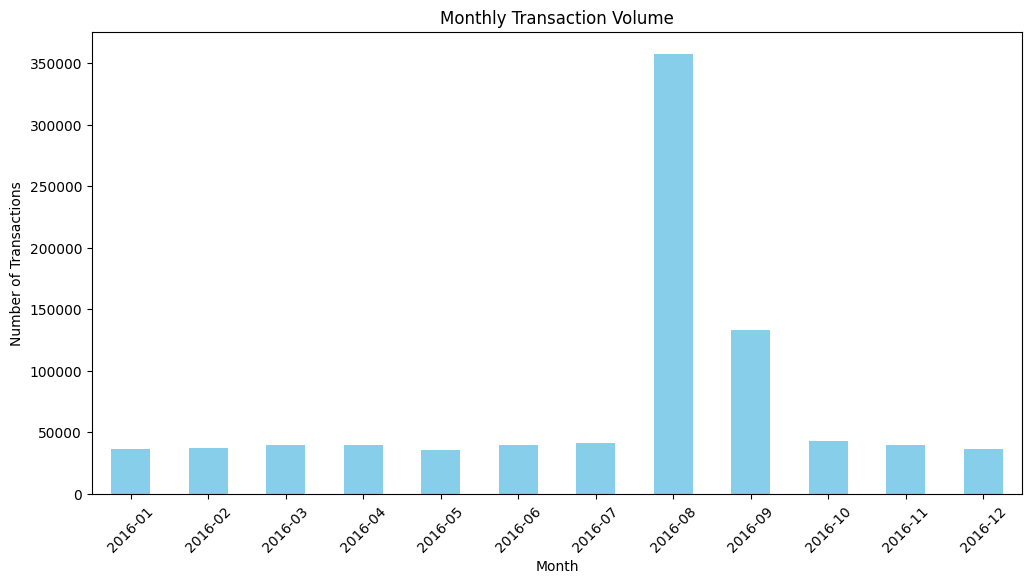

In [22]:
data['Month'] = data['TransactionDate'].dt.to_period('M').astype(str)
monthly_txn = data.groupby('Month')['TransactionID'].count()

plt.figure(figsize=(12,6))
monthly_txn.plot(kind='bar', color='skyblue')
plt.title("Monthly Transaction Volume")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.show()

## Customer Age Distribution

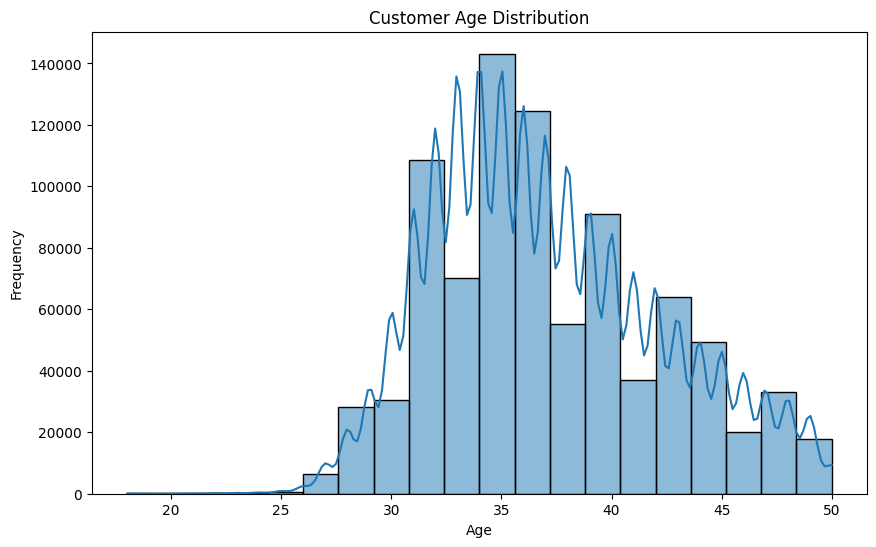

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Transaction Amount Distribution

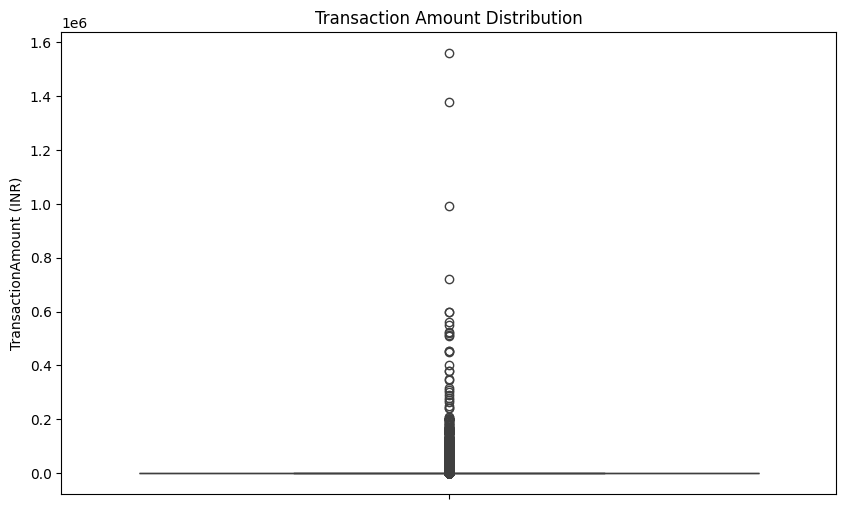

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data['TransactionAmount (INR)'])
plt.title("Transaction Amount Distribution")
plt.show()

## Gender Distribution

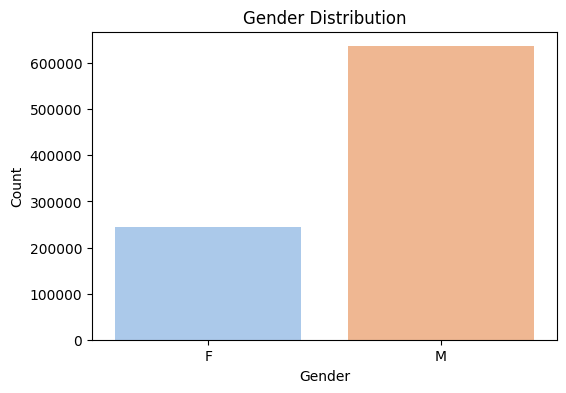

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='CustGender', data=data, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


## Top Locations by Transaction Count

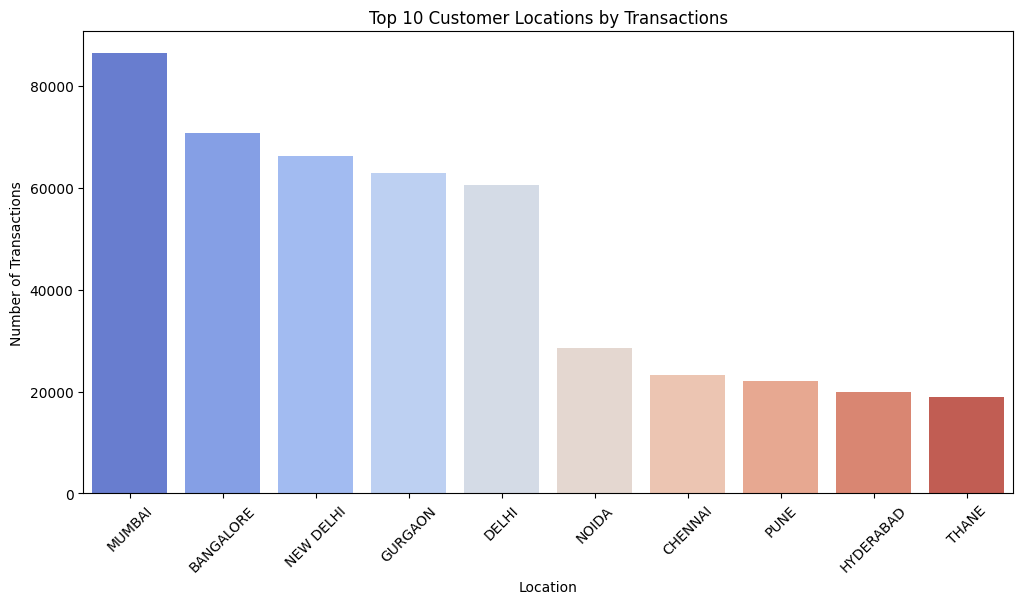

In [26]:
top_locations = data['CustLocation'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='coolwarm')
plt.title("Top 10 Customer Locations by Transactions")
plt.xticks(rotation=45)
plt.xlabel("Location")
plt.ylabel("Number of Transactions")
plt.show()

# Feature Engineering

In [27]:
# Set reference date (latest transaction)
reference_date = data['TransactionDate'].max()

# Group data by CustomerID to compute RFM
rfm = data.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (reference_date - x.max()).days,  # Recency: days since last transaction
    'TransactionID': 'count',                                      # Frequency: number of transactions
    'TransactionAmount (INR)': 'sum'                                     # Monetary: total spent
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']


In [28]:
# Check how many customers have the same Recency, Frequency, and Monetary values
print("Recency Value Counts:\n", rfm['Recency'].value_counts().sort_index(), "\n")
print("Frequency Value Counts:\n", rfm['Frequency'].value_counts().sort_index(), "\n")
print("Monetary Value Counts:\n", rfm['Monetary'].value_counts().sort_index(), "\n")


Recency Value Counts:
 Recency
0      17310
1      18791
30     21335
31     17859
49      2991
54         2
61     21264
62     17638
70      1544
73      5885
74      9921
75      6593
77      2763
78      5333
82     11617
85     15586
86     15522
87     16133
91     16930
92     16972
100    14995
101    12922
102    12465
103    15850
104    15930
105    12973
106    13542
107    12963
108    12567
109    13528
110    16679
111    15178
112    13360
113    13854
114    14820
115    14339
116    17126
117    17716
118    18768
122    15111
123    14554
153    14614
154    18890
183    13250
184    18134
214    14448
215    14005
244    17730
245    13504
275    17441
276    13235
304    14747
305    13368
335    14382
336    12852
Name: count, dtype: int64 

Frequency Value Counts:
 Frequency
1    656016
2     94177
3     10639
4       933
5        61
6         3
Name: count, dtype: int64 

Monetary Value Counts:
 Monetary
0.00          471
0.01           16
0.04            2
0.05

## RFM Scoring and Customer Segmentation

In [29]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])



In [30]:
# Custom bins based on inspection
rfm['F_Score'] = pd.cut(rfm['Frequency'],
                        bins=[0, 1, 2, 4, rfm['Frequency'].max()],
                        labels=[1, 2, 3, 4],
                        include_lowest=True)


* Bin 1: One-time customers.

* Bin 2: Low repeaters (2 txns).

* Bin 3: Moderate (3–4 txns).

* Bin 4: High frequency (5+ txns).

In [31]:
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')


In [32]:
rfm['RFM_Segment'] = (
    rfm['R_Score'].astype(str) + 
    rfm['F_Score'].astype(str) + 
    rfm['M_Score'].astype(str)
)

rfm['RFM_Score'] = (
    rfm[['R_Score', 'F_Score', 'M_Score']]
    .astype(int)
    .sum(axis=1)
)


In [33]:
def assign_segment(score):
    if score >= 9:
        return 'Best Customers'
    elif score >= 6:
        return 'Loyal Customers'
    elif score >= 4:
        return 'At Risk'
    else:
        return 'Churned'

rfm['Segment'] = rfm['RFM_Score'].apply(assign_segment)


In [34]:
from sklearn.preprocessing import StandardScaler

# Standardize Recency, Frequency, Monetary
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


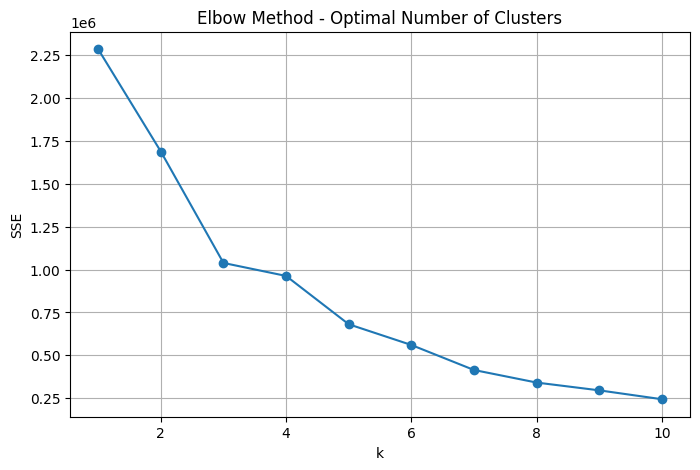

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    sse.append(model.inertia_)

# Plot SSE to find elbow
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title("Elbow Method - Optimal Number of Clusters")
plt.xlabel("k")
plt.ylabel("SSE")
plt.grid(True)
plt.show()


In [36]:
# Fit model with chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [37]:
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'}).reset_index()

print(cluster_summary)


   Cluster     Recency  Frequency     Monetary   Count
0        0   43.022227   1.000141  3431.005762  106267
1        1  274.670421   1.004523  1208.040937  141708
2        2   89.572310   2.120761  2650.205189  105158
3        3  113.403439   1.000000   744.200539  408696


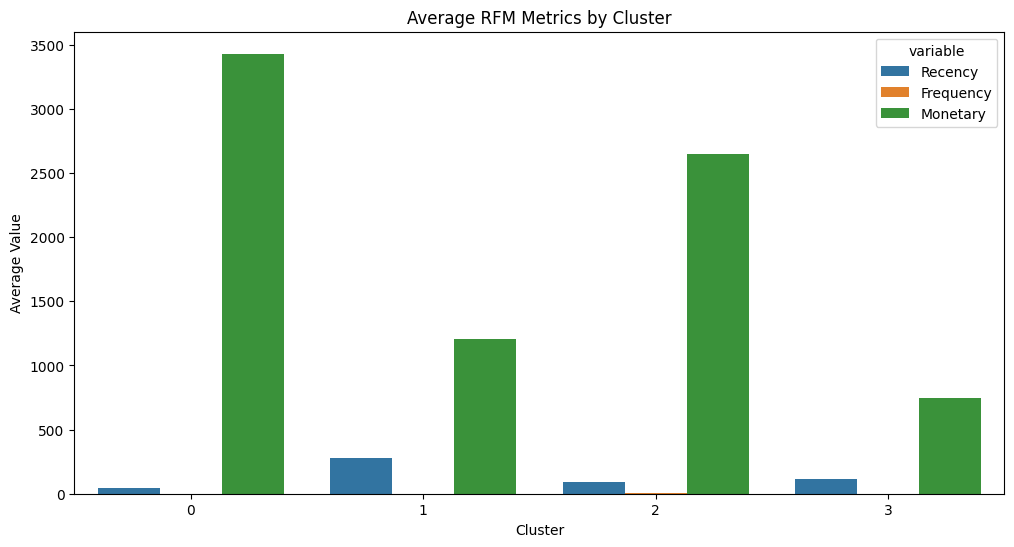

In [38]:
import seaborn as sns

# Prepare for plotting
melted = cluster_summary.melt(id_vars='Cluster', value_vars=['Recency', 'Frequency', 'Monetary'])

plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Cluster', y='value', hue='variable')
plt.title("Average RFM Metrics by Cluster")
plt.ylabel("Average Value")
plt.show()


In [39]:
# Save RFM + Clustering results
rfm.to_csv("rfm_segmented.csv", index=False)


In [40]:
# View all unique RFM-based segments
print(rfm['Segment'].unique())


['Best Customers' 'Loyal Customers' 'At Risk' 'Churned']
